# Применение алгоритмов классификации для обнаружения аномалий в сетевом трафике

Датасет содержит информацию (метаданные) о характеристиках передаваемого по сети трафика: количество пакетов, количество фреймов и т.д. В колонке <code>class</code> содержится информация о том, является ли трафик нормальным (0) или подозрительным (1).

Авторское замечание: бля я уже ебал этот курс

# Импорт библиотек и чтение набора данных

In [224]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

data_URL = "https://storage.yandexcloud.net/lms-itmo-ru-files-27a87tyf/Cyber_Security/Task_2_Python/360T.csv"

df = pd.read_csv(data_URL)
df

,num_frames,num_frames_avg,num_packets,num_packets_avg,num_packets_out_avg,num_packets_out_max,num_packets_out_min,num_packets_in_avg,num_packets_in_max,num_packets_in_min,...,num_forwarded_packets_avg,num_forwarded_packets_max,num_forwarded_packets_min,num_packets_created_avg,num_packets_created_max,num_packets_created_min,frac_packets_created_acquired_avg,frac_packets_created_acquired_max,frac_packets_created_acquired_min,class
0,38007,2533,31348,2089,218,1777,46,266,2266,38,...,583,1328,108,69,136,46,1.02,2,1,1
1,32695,2179,26253,1750,212,1726,48,212,1814,34,...,575,1344,105,32,83,48,1.00,1,1,1
2,32655,2177,26396,1759,212,1654,41,212,1701,30,...,578,1270,120,21,76,41,1.00,1,1,1
3,33541,2236,26612,1774,213,1695,50,214,1741,38,...,586,1316,112,1,82,50,1.00,1,1,1
4,32925,2195,26472,1764,213,1750,44,213,1805,35,...,586,1375,115,1,83,44,1.00,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2331,33025,2201,26446,1763,212,1654,45,213,1674,37,...,579,1273,126,1,81,45,1.00,1,1,0
2332,33072,2204,26372,1758,211,1685,39,212,1721,39,...,573,1307,106,1,86,39,1.00,1,1,0
2333,32555,2170,26043,1736,210,1667,48,210,1716,37,...,567,1289,117,1,77,48,1.00,1,1,0
2334,33033,2202,26395,1759,212,1714,47,213,1722,38,...,581,1335,92,1,79,46,1.00,1,1,0


In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2336 entries, 0 to 2335
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   num_frames                         2336 non-null   int64  
 1   num_frames_avg                     2336 non-null   int64  
 2   num_packets                        2336 non-null   int64  
 3   num_packets_avg                    2336 non-null   int64  
 4   num_packets_out_avg                2336 non-null   int64  
 5   num_packets_out_max                2336 non-null   int64  
 6   num_packets_out_min                2336 non-null   int64  
 7   num_packets_in_avg                 2336 non-null   int64  
 8   num_packets_in_max                 2336 non-null   int64  
 9   num_packets_in_min                 2336 non-null   int64  
 10  weighted_num_packets_in_avg        2336 non-null   float64
 11  weighted_num_packets_in_max        2336 non-null   float

Видно, что категориальных признаков нет. При этом в названиях некоторых признаков фигурируют слова типа <code>avg</code>, <code>weighted</code> и так далее. Вполне возможно, что такие признаки являются производными от других, и, как следствие, датасет может содержать признаки, которые будут коррелированы.

Постройте гистограмму распределения объектов по классам. Вычислите долю объектов класса 1.

class
0    0.963613
1    0.036387
Name: proportion, dtype: float64

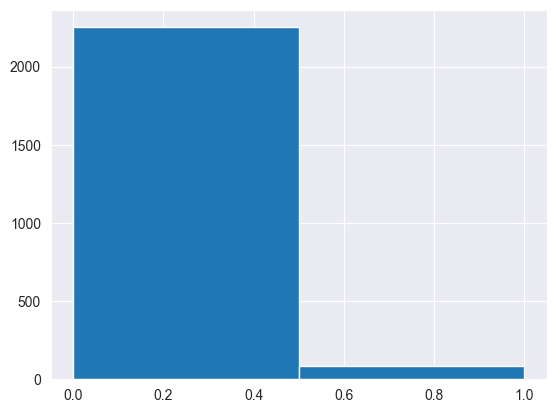

In [226]:
df['class'].hist(bins=2)
df['class'].value_counts(normalize=True)

# 1. Построение базовой модели

В качестве первого приближения имеет смысл построить модель классификации без каких-либо манипуляций с данными.

При помощи <code>train_test_split()</code> разбейте набор данных на обучающую и тестовую выборки <b>с параметрами, указанными в вашем задании</b>. Используйте стратификацию по колонке <code>class</code>.

Вычислите выборочное среднее колонки <code>weighted_num_packets_in_avg</code> тренировочного набора данных.

Обучите модель <code>DecisionTreeClassifier()</code> с параметрами указанными в вашем задании.

Как видно из предыдущего пункта, в наборе данных наблюдается явный дисбаланс представителей классов. Это следует учесть при оценке модели. Вычислите <code>f1_score</code> модели на тестовых данных. Настоятельно рекомендуем использовать так называемый <a href = "https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html"><code>classification_report()</code></a>, где приведены сразу несколько метрик (не стоит забывать про параметр <code>digits</code>).

Вычислите <code>f_score</code> модели на тестовых данных для класса 1.

In [227]:
test_size = 0.2
random_state = 19

X = df.drop(columns=['class'])
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=19, stratify=y
)
clf = DecisionTreeClassifier(random_state=19)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
f1score = f1_score(y_test, y_pred)
print("F1-score = %.3f" %f1score)

F1-score = 0.800


Видно, что модель достаточно плохо умеет верно находить подозрительный трафик (класс 1), попробуем это исправить.

# Работа с признаками

Имеет смысл проверить признаки на коррелированность. Постройте матрицу корреляций для исходного набора данных.

In [228]:
corr = df.corr().abs()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\formats\style.py:3807: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\formats\style.py:3808: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,num_frames,num_frames_avg,num_packets,num_packets_avg,num_packets_out_avg,num_packets_out_max,num_packets_out_min,num_packets_in_avg,num_packets_in_max,num_packets_in_min,weighted_num_packets_in_avg,weighted_num_packets_in_max,weighted_num_packets_in_min,frac_packets_in_out_avg,frac_packets_in_out_max,frac_packets_in_out_min,frac_packets_in_out_pan_avg,frac_packets_in_out_pan_max,frac_packets_in_out_pan_min,num_packets_equal_src_avg,num_packets_equal_src_max,num_packets_equal_src_min,num_packets_equal_src_pan_avg,num_packets_equal_src_pan_max,num_packets_equal_src_pan_min,num_packets_equal_dest_avg,num_packets_equal_dest_max,num_packets_equal_dest_min,num_packets_equal_dest_pan_avg,num_packets_equal_dest_pan_max,num_packets_equal_dest_pan_min,num_frames_out_avg,num_frames_out_max,num_frames_out_min,num_frames_in_avg,num_frames_in_max,num_frames_in_min,weighted_num_frames_in_avg,weighted_num_frames_in_max,weighted_num_frames_in_min,num_route_msgs,num_forwarded_packets,num_forwarded_packets_avg,num_forwarded_packets_max,num_forwarded_packets_min,num_packets_created_avg,num_packets_created_max,num_packets_created_min,frac_packets_created_acquired_avg,frac_packets_created_acquired_max,frac_packets_created_acquired_min,class
num_frames,1.000000,0.954684,0.999463,0.951252,0.790891,0.459584,0.112989,0.855334,0.467744,0.083041,0.481430,0.321514,0.034119,0.132638,0.049467,nan,0.131747,0.004948,0.049280,0.002110,0.025082,0.170786,0.046356,0.011666,0.250753,0.042681,0.045669,0.076242,0.046356,0.039559,0.164295,0.791551,0.459216,0.106138,0.864977,0.467027,0.075004,0.483645,0.320611,0.038206,0.074141,0.996149,0.956036,0.458797,0.141906,0.041424,0.020742,0.115047,0.168769,0.069239,0.254952,0.058100
num_frames_avg,0.954684,1.000000,0.954265,0.996649,0.867733,0.611964,0.182740,0.956293,0.629346,0.175339,0.523135,0.355787,0.019483,0.234464,0.056569,nan,0.263165,0.148316,0.121732,0.173525,0.106719,0.288455,0.244354,0.137702,0.362631,0.240102,0.066307,0.168523,0.244354,0.080492,0.295207,0.870839,0.612504,0.176573,0.965520,0.628228,0.161204,0.523863,0.354337,0.026000,0.159021,0.952056,0.980212,0.610309,0.018280,0.112479,0.111167,0.186139,0.173226,0.146361,0.260165,0.060989
num_packets,0.999463,0.954265,1.000000,0.953487,0.790970,0.459044,0.113007,0.859401,0.468329,0.081127,0.484235,0.322398,0.028481,0.133444,0.048555,nan,0.134866,0.005799,0.062535,0.001765,0.024562,0.170617,0.046733,0.011156,0.251171,0.043124,0.045100,0.075820,0.046733,0.038994,0.164415,0.789284,0.457976,0.105374,0.865868,0.466635,0.074093,0.484715,0.320701,0.034153,0.089831,0.995495,0.955438,0.458089,0.142957,0.054416,0.020022,0.114797,0.169195,0.083540,0.255605,0.058650
num_packets_avg,0.951252,0.996649,0.953487,1.000000,0.866114,0.609232,0.182537,0.964184,0.629293,0.170048,0.528424,0.357211,0.005849,0.236077,0.058542,nan,0.270628,0.150202,0.154580,0.173988,0.107808,0.287610,0.244763,0.138688,0.363023,0.240683,0.067607,0.167072,0.244763,0.081751,0.294894,0.863226,0.607988,0.174254,0.965381,0.625714,0.158534,0.524801,0.353778,0.016345,0.195709,0.948460,0.976690,0.607172,0.021071,0.145168,0.112742,0.185284,0.174046,0.180541,0.261452,0.062333
num_packets_out_avg,0.790891,0.867733,0.790970,0.866114,1.000000,0.696286,0.251009,0.913535,0.695999,0.029790,0.498299,0.358128,0.047417,0.006762,0.393910,nan,0.004781,0.547390,0.007602,0.588116,0.550975,0.358927,0.590741,0.550338,0.363560,0.588253,0.496821,0.051931,0.590741,0.508201,0.153225,0.996447,0.695373,0.241040,0.923605,0.695261,0.019314,0.500863,0.357110,0.049833,0.027606,0.816024,0.900213,0.696064,0.055374,0.034910,0.550358,0.250721,0.276511,0.033048,0.334813,0.094685
num_packets_out_max,0.459584,0.611964,0.459044,0.609232,0.696286,1.000000,0.213602,0.655197,0.995871,0.066176,0.312767,0.303762,0.127682,0.005794,0.361143,nan,0.027425,0.489183,0.000735,0.422698,0.444063,0.280684,0.474661,0.466608,0.364156,0.473785,0.410778,0.032405,0.474661,0.418551,0.100238,0.694908,0.999346,0.207245,0.665008,0.996287,0.051241,0.315453,0.304097,0.13

Видно, что для одного признака коэффицент корреляции вычислить не удалось, так как соответствующая колонка содержит одни нули. Удалите этот признак из рассмотрения.

In [229]:
df = df.drop(columns=['frac_packets_in_out_min'])
df

,num_frames,num_frames_avg,num_packets,num_packets_avg,num_packets_out_avg,num_packets_out_max,num_packets_out_min,num_packets_in_avg,num_packets_in_max,num_packets_in_min,...,num_forwarded_packets_avg,num_forwarded_packets_max,num_forwarded_packets_min,num_packets_created_avg,num_packets_created_max,num_packets_created_min,frac_packets_created_acquired_avg,frac_packets_created_acquired_max,frac_packets_created_acquired_min,class
0,38007,2533,31348,2089,218,1777,46,266,2266,38,...,583,1328,108,69,136,46,1.02,2,1,1
1,32695,2179,26253,1750,212,1726,48,212,1814,34,...,575,1344,105,32,83,48,1.00,1,1,1
2,32655,2177,26396,1759,212,1654,41,212,1701,30,...,578,1270,120,21,76,41,1.00,1,1,1
3,33541,2236,26612,1774,213,1695,50,214,1741,38,...,586,1316,112,1,82,50,1.00,1,1,1
4,32925,2195,26472,1764,213,1750,44,213,1805,35,...,586,1375,115,1,83,44,1.00,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2331,33025,2201,26446,1763,212,1654,45,213,1674,37,...,579,1273,126,1,81,45,1.00,1,1,0
2332,33072,2204,26372,1758,211,1685,39,212,1721,39,...,573,1307,106,1,86,39,1.00,1,1,0
2333,32555,2170,26043,1736,210,1667,48,210,1716,37,...,567,1289,117,1,77,48,1.00,1,1,0
2334,33033,2202,26395,1759,212,1714,47,213,1722,38,...,581,1335,92,1,79,46,1.00,1,1,0


Видно, что сильно коррелированных признаков достаточно много. Имеет смысл удалить из рассмотрения признаки, для которых модуль коэффициента корреляции превышает 0.95.

In [230]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
df.drop(to_drop, axis=1, inplace=True)
df

,num_frames,num_packets_out_avg,num_packets_out_max,num_packets_out_min,num_packets_in_min,weighted_num_packets_in_avg,weighted_num_packets_in_max,weighted_num_packets_in_min,frac_packets_in_out_avg,frac_packets_in_out_max,...,num_packets_equal_dest_min,num_packets_equal_dest_pan_min,num_frames_in_min,num_route_msgs,num_forwarded_packets_min,num_packets_created_avg,frac_packets_created_acquired_avg,frac_packets_created_acquired_max,frac_packets_created_acquired_min,class
0,38007,218,1777,46,38,124.13,1519.0,303.33,0.31,1,...,41,344,42,4776,108,69,1.02,2,1,1
1,32695,212,1726,48,34,111.89,1814.0,257.00,0.32,1,...,44,339,43,0,105,32,1.00,1,1,1
2,32655,212,1654,41,30,86.00,1157.0,200.33,0.29,1,...,47,341,31,0,120,21,1.00,1,1,1
3,33541,213,1695,50,38,107.57,1427.0,298.00,0.29,1,...,40,357,43,0,112,1,1.00,1,1,1
4,32925,213,1750,44,35,89.26,1364.0,194.67,0.32,1,...,48,351,47,0,115,1,1.00,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2331,33025,212,1654,45,37,87.60,1025.0,326.00,0.34,1,...,39,352,45,0,126,1,1.00,1,1,0
2332,33072,211,1685,39,39,79.92,1077.0,255.00,0.30,1,...,47,355,45,0,106,1,1.00,1,1,0
2333,32555,210,1667,48,37,102.88,1716.0,302.50,0.29,1,...,42,355,45,0,117,1,1.00,1,1,0
2334,33033,212,1714,47,38,81.45,1254.0,213.33,0.30,1,...,41,333,45,0,92,1,1.00,1,1,0


In [231]:
remaining_features = df.drop(columns=['class']).shape[1]
print("Количество оставшихся признаков:", remaining_features)

Количество оставшихся признаков: 25


При помощи <code>train_test_split()</code> разбейте набор данных на обучающую и тестовую выборки <b>с параметрами, указанными в вашем задании</b>. Используйте стратификацию по колонке <code>class</code>.

Обучите модель <code>DecisionTreeClassifier()</code> с параметрами указанными в вашем задании.

Вычислите <code>f_score</code> модели на тестовых данных для класса 1.

In [232]:
X = df.drop(columns=['class'])
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=19, stratify=y
)

clf = DecisionTreeClassifier(random_state=19)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
score = f1_score(y_test, y_pred)
print("F1 Score:", round(score, 3))

F1 Score: 0.8


Имеет смысл рассмотреть ансамбль моделей. Пусть это будет модель на основе <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html"><code>GradientBoostingClassifier()</code></a>. Обучите модель на тренировочных данных. Используйте параметры, указанные в вашем индивидуальном задании.

Вычислите <code>f_score</code> модели на тестовых данных для класса 1.

In [233]:
print("Список колонок:", df.columns.tolist())

X = df.drop(columns=['class'], axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=19, stratify=y
)

gb_clf = GradientBoostingClassifier(n_estimators=100, max_depth=3,random_state=19)
gb_clf.fit(X_train, y_train)

y_pred = gb_clf.predict(X_test)
score_full = f1_score(y_test, y_pred, pos_label=1)
print("F1 Score (Первоначальный):", round(score_full, 3))

Список колонок: ['num_frames', 'num_packets_out_avg', 'num_packets_out_max', 'num_packets_out_min', 'num_packets_in_min', 'weighted_num_packets_in_avg', 'weighted_num_packets_in_max', 'weighted_num_packets_in_min', 'frac_packets_in_out_avg', 'frac_packets_in_out_max', 'frac_packets_in_out_pan_avg', 'frac_packets_in_out_pan_max', 'frac_packets_in_out_pan_min', 'num_packets_equal_src_avg', 'num_packets_equal_src_min', 'num_packets_equal_src_pan_min', 'num_packets_equal_dest_min', 'num_packets_equal_dest_pan_min', 'num_frames_in_min', 'num_route_msgs', 'num_forwarded_packets_min', 'num_packets_created_avg', 'frac_packets_created_acquired_avg', 'frac_packets_created_acquired_max', 'frac_packets_created_acquired_min', 'class']
F1 Score (Первоначальный): 0.774


В поле <code>feature_importances_</code> объекта модели содержатся значения важности признаков с точки зрения модели. Определите топ 10 признаков (в порядке убывания важности). Отберите из исходного датасета соответствующие колонки. Определите название самого важного признака.

Авторское замечание: система не принял топ 2 признаков. Я рил хз в чем причина

In [236]:
feature_importances = pd.Series(gb_clf.feature_importances_, index=X.columns)
top_10_features = feature_importances.sort_values(ascending=False).head(10).index.tolist()
print(f"Самый важный признак: {top_10_features}")

Самый важный признак: ['frac_packets_created_acquired_min', 'num_packets_equal_src_pan_min', 'frac_packets_created_acquired_avg', 'num_packets_out_avg', 'num_packets_created_avg', 'num_route_msgs', 'num_frames', 'weighted_num_packets_in_avg', 'num_packets_out_max', 'num_packets_out_min']


Далее аналогично: сплит, обучение
При помощи <code>GradientBoostingClassifier()</code> с параметрами, указанными в вашем задании.


Вычислите <code>f_score</code> модели на тестовых данных для класса 1.

In [235]:
X_new = df[top_10_features]
y_new = df['class']
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_new, y_new, test_size=0.2, random_state=19, stratify=y_new
)

gbc_new = GradientBoostingClassifier(random_state=19)
gbc_new.fit(X_train_new, y_train_new)

y_pred_new = gbc_new.predict(X_test_new)
f1_new = f1_score(y_test_new, y_pred_new, pos_label=1)
print(f"F1-score после отбора признаков: {round(f1_new, 3)}")

F1-score после отбора признаков: 0.839
